<a href="https://colab.research.google.com/github/Kishankumar1328/KNeighboursClassifier/blob/main/KNeighboursClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [19]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [5]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [6]:
df.tail()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3
999,3,50,36,1,7,39.0,3,3,0.0,1,3,2


In [7]:
df.sample(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
407,3,46,45,0,12,96.0,3,17,0.0,0,1,2
252,1,52,54,1,5,153.0,5,10,0.0,0,2,2
116,3,31,31,0,4,48.0,1,15,0.0,0,1,3
119,3,3,31,0,1,28.0,1,0,0.0,0,1,1
910,3,43,29,0,4,33.0,1,13,0.0,1,4,3


In [8]:
df.isnull()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
region,1000.0,2.022,0.816200,1.0,1.0,2.0,3.0,3.0
tenure,1000.0,35.526,21.359812,1.0,17.0,34.0,54.0,72.0
age,1000.0,41.684,12.558816,18.0,32.0,40.0,51.0,77.0
marital,1000.0,0.495,0.500225,0.0,0.0,0.0,1.0,1.0
address,1000.0,11.551,10.086681,0.0,3.0,9.0,18.0,55.0
income,1000.0,77.535,107.044165,9.0,29.0,47.0,83.0,1668.0
ed,1000.0,2.671,1.222397,1.0,2.0,3.0,4.0,5.0
employ,1000.0,10.987,10.082087,0.0,3.0,8.0,17.0,47.0
retire,1000.0,0.047,0.211745,0.0,0.0,0.0,0.0,1.0
gender,1000.0,0.517,0.499961,0.0,0.0,1.0,1.0,1.0


In [21]:
dummy_df = pd.get_dummies(df["custcat"])
dummy_df

,1,2,3,4
0,1,0,0,0
1,0,0,0,1
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
995,1,0,0,0
996,1,0,0,0
997,0,0,0,1
998,0,0,1,0


In [22]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

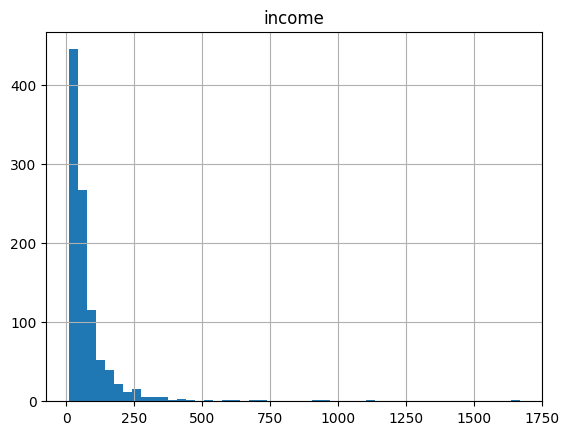

In [23]:
df.hist(column='income',bins=50)

array([[<Axes: title={'center': 'age'}>]], dtype=object)

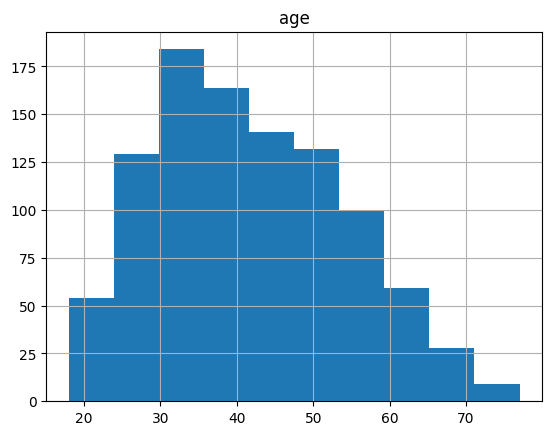

In [26]:
df.hist(column="age",bins=10)

In [27]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [29]:
x=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']]
x

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3
996,1,7,34,0,2,22.0,5,5,0.0,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1
998,3,70,49,0,18,87.0,2,22,0.0,1,1


In [32]:
y=df["custcat"].values
y[0:5]

array([1, 4, 3, 1, 3])

In [34]:
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
print("Train set:",x_train.shape,y_train.shape)
print("Test set:",x_test.shape,y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [40]:
k=4
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [42]:
yhat=neigh.predict(x_test)
yhat[0:5]

array([4, 2, 3, 2, 3])

In [48]:
print("Train Set Accuracy: ",metrics.accuracy_score(y_train,neigh.predict(x_train)))
print("Test Set Accuracy: ",metrics.accuracy_score(y_test,yhat))

Train Set Accuracy:  0.54375
Test Set Accuracy:  0.325


In [54]:
kk=6
neigh2=KNeighborsClassifier(n_neighbors=kk).fit(x_train,y_train)
yhat2=neigh2.predict(x_test)
yhat2[0:6]

array([4, 2, 3, 3, 3, 3])

In [69]:
print("Train set Accuracy: ",metrics.accuracy_score(y_train,neigh2.predict(x_train)))
print("Test set Accuracy: ",metrics.accuracy_score(y_test,yhat2))

Train set Accuracy:  0.5075
Test set Accuracy:  0.33


In [73]:
kkk=300
neigh3=KNeighborsClassifier(n_neighbors=kkk).fit(x_train,y_train)
yhat3=neigh3.predict(x_test)
print(yhat3[0:10])
print("Train Set Accuracy: ",metrics.accuracy_score(y_train,neigh3.predict(x_train)))
print("Test Set Accuracy: ",metrics.accuracy_score(y_test,yhat3))

[3 4 1 3 1 4 1 1 1 4]
Train Set Accuracy:  0.4
Test Set Accuracy:  0.4


In [76]:
ks=10
mean_acc=np.zeros((ks-1))
std_acc=np.zeros((ks-1))

for i in range(1,ks):
  neigh=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
  yhat=neigh.predict(x_test)
  mean_acc[i-1]=metrics.accuracy_score(y_test,yhat)
  std_acc[i-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print("Mean_acc:",mean_acc)
print("Std_acc:",std_acc)

Mean_acc: [0.29  0.34  0.365 0.325 0.33  0.33  0.33  0.335 0.33 ]
Std_acc: [0.03208582 0.03349627 0.03404225 0.0331191  0.03324906 0.03324906
 0.03324906 0.03337477 0.03324906]


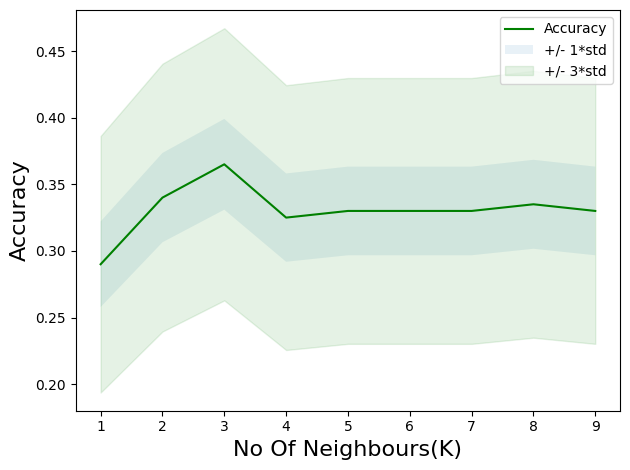

In [83]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.fill_between(range(1,ks),mean_acc-3*std_acc,mean_acc+3*std_acc,alpha=0.10,color='green')
plt.legend(("Accuracy","+/- 1*std","+/- 3*std"))
plt.ylabel("Accuracy",fontsize=16)
plt.xlabel("No Of Neighbours(K)",fontsize=16)
plt.tight_layout()